In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train.shape, x_test.shape)

((60000, 28, 28), (10000, 28, 28))

In [3]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [7]:
def visualized_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Експеримент 1:
## Створимо модель з 2 прихованими шарами: 
## Dense(128, activation="relu"), Dense(64, activation="relu") 
## та 1 вихідним шаром: Dense(10, activation="softmax")
## оптимізатор: Adam
## Розмір батчів: 256
## Епох: 20

In [8]:
model1 = Sequential([
    Dense(128, activation="relu", input_dim=x_train.shape[1]),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [9]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
history1 = model1.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 0.6553 - accuracy: 0.7777 - val_loss: 0.4581 - val_accuracy: 0.8427
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4226 - accuracy: 0.8530 - val_loss: 0.4230 - val_accuracy: 0.8518
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3842 - accuracy: 0.8622 - val_loss: 0.3806 - val_accuracy: 0.8667
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3558 - accuracy: 0.8715 - val_loss: 0.3747 - val_accuracy: 0.8666
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3360 - accuracy: 0.8794 - val_loss: 0.3476 - val_accuracy: 0.8758
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3189 - accuracy: 0.8843 - val_loss: 0.3482 - val_accuracy: 0.8735
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3058 - accuracy: 0.8886 - val_loss: 0.3511 - val_accuracy: 0.8753
Epoch 

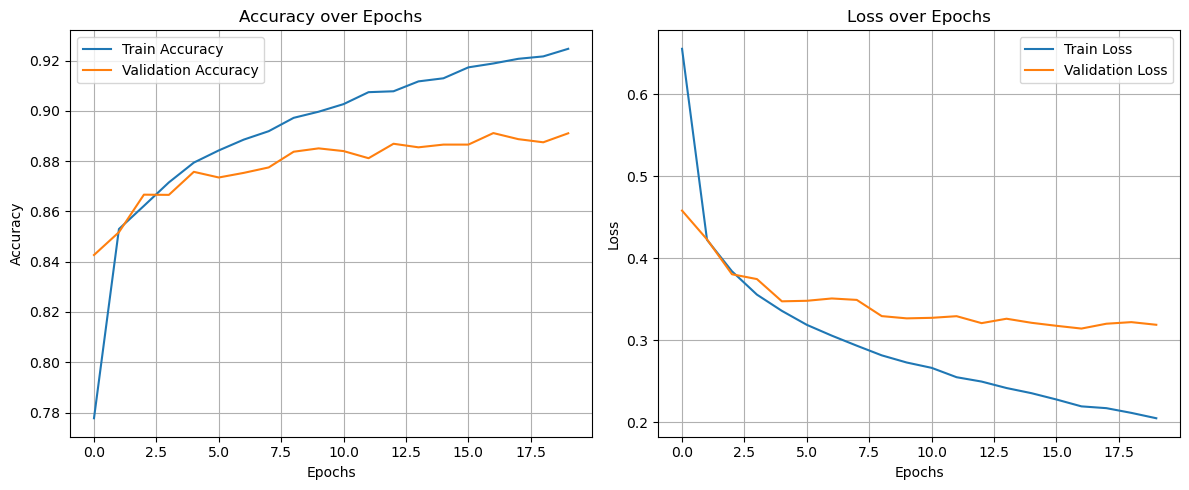

In [12]:
visualized_history(history1)

In [13]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8826


[0.3462927043437958, 0.8826000094413757]

In [14]:
y_pred = model1.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.84      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.84      0.77      0.80      1000
           5       0.98      0.95      0.96      1000
           6       0.76      0.66      0.71      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Результат:
## точність на тренувальних даних: 92.31%
## точність на тестових даних: 88.09%
## похибка на тренувальних даних: 0.20
## похибка на тестових даних: 0.34

## Експеримент 2:
## Створимо модель з 3 прихованими шарами: 
Dense(256, activation="sigmoid", input_shape=(784,)),

Dense(128, activation="sigmoid"),

Dense(64, activation="relu"),
## та 1 вихідним шаром: 

Dense(10, activation="softmax")
## оптимізатор: Adam(lr=0.003)
## Розмір батчів: 128
## Епох: 50

In [15]:
model2 = Sequential([
    Dense(256, activation="sigmoid", input_shape=(784,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model2.compile(optimizer=Adam(learning_rate=0.003), loss="categorical_crossentropy", metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5953 - accuracy: 0.7897 - val_loss: 0.4258 - val_accuracy: 0.8426
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8555 - val_loss: 0.3874 - val_accuracy: 0.8583
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3462 - accuracy: 0.8732 - val_loss: 0.3689 - val_accuracy: 0.8632
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.8810 - val_loss: 0.3443 - val_accuracy: 0.8771
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8884 - val_loss: 0.3269 - val_accuracy: 0.8793
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2874 - accuracy: 0.8931 - val_loss: 0.3381 - val_accuracy: 0.8798
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.8975 - val_loss: 0.3967 - val_accuracy: 0.8545
Epoch 

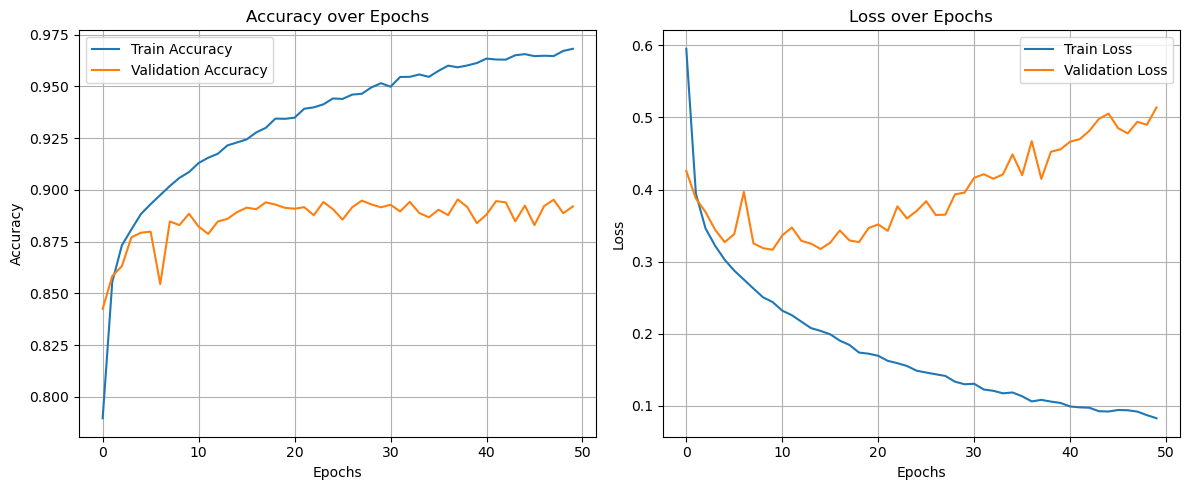

In [16]:
visualized_history(history2)

In [17]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5664 - accuracy: 0.8848


[0.5664017796516418, 0.8848000168800354]

In [18]:
y_pred = model2.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.83      0.81      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.68      0.73      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000



## Результат:
## точність на тренувальних даних: 96.67%
## точність на тестових даних: 88.66%
## похибка на тренувальних даних: 0.08
## похибка на тестових даних: 0.52

## Експеримент 3:
## Створимо модель з 6 прихованими шарами: 
Dense(256, activation="sigmoid", input_shape=(784,)),

Dropout(0.2),

Dense(128, activation="sigmoid"),

Dropout(0.2),

Dense(64, activation="relu"),

Dropout(0.2),
## та 1 вихідним шаром: 

Dense(10, activation="softmax")
## оптимізатор: Adam
## Розмір батчів: 128
## Епох: 50

In [19]:
model3 = Sequential([
    Dense(256, activation="sigmoid", input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation="sigmoid"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history3 = model3.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.9169 - accuracy: 0.6604 - val_loss: 0.5081 - val_accuracy: 0.8112
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5279 - accuracy: 0.8128 - val_loss: 0.4316 - val_accuracy: 0.8438
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4620 - accuracy: 0.8350 - val_loss: 0.4003 - val_accuracy: 0.8527
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4273 - accuracy: 0.8470 - val_loss: 0.3824 - val_accuracy: 0.8593
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4078 - accuracy: 0.8544 - val_loss: 0.3673 - val_accuracy: 0.8644
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3890 - accuracy: 0.8598 - val_loss: 0.3662 - val_accuracy: 0.8671
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3714 - accuracy: 0.8665 - val_loss: 0.3704 - val_accuracy: 0.8624
Epoch 

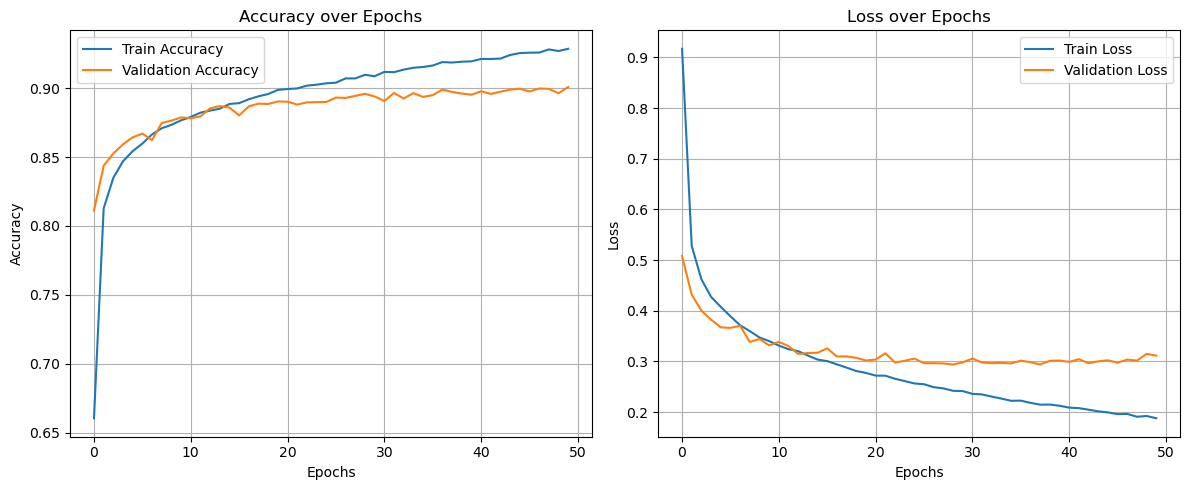

In [20]:
visualized_history(history3)

In [21]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8955


[0.33631572127342224, 0.8955000042915344]

In [22]:
y_pred = model3.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.86      0.82      1000
           3       0.87      0.92      0.89      1000
           4       0.84      0.81      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.65      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



## Результат:
## точність на тренувальних даних: 92.93%
## точність на тестових даних: 89.3%
## похибка на тренувальних даних: 0.18
## похибка на тестових даних: 0.34

## Висновок:

## Перша модель виявилась перенавченою і точність на тестових даних є приблизно 88%, а похибка - 0.34, що для передбачень не є найкращим результатом.
## Друга модель виявилася також перенавченою і точність на тестових даних - 88.6%, а похибка - 0.52, що для передбачень не є найкращим результатом також, тому що модель гарно навчилася на тренувальних даних, але так і не навчилася їх узагальнювати.
## У третій моделі до кожного прихованого шару додано Dropout(0.2) з ціллю не довести модель до перенавчання. точність на тестових даних - 89.3%, похибка - 0.34. Модель дійсно стала менш сприйнятливою до перенавчання, навіть похибка стала набагато меншою, ніж у моделі, де не було дропауту. Точінсть стала не набагато кращою, проте це найкраща точність за всі експерименти.
## У висновку, мені не вдалося навчити модель з точністю на тестових даних, вищою за 91%, як було сказано у завданні, можливо, через те, що для датасету fashion mnist потрібні інші методи навчання для кращого результату передбачення (наприклад використання CNN). 

## Результати точностей і похибок можуть трішки відрізнятися у висновку, через те, що було перезапущено код, а рандомізація була нефіксованою.